In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.16.1'

In [3]:
import pandas as pd
df = pd.read_csv('C:\\Users\\User\\Desktop\\Msc Computational physics\\Υπολογιστική Κβαντομηχανική\\HIGGS_8K.csv')
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
1,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
2,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
3,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
4,1.0,0.661761,0.486930,0.542516,2.630618,1.098063,1.021878,-2.306271,-0.652999,0.000000,...,-0.943217,0.566404,3.101961,4.883954,2.585889,0.992005,1.935075,1.144530,1.818775,2.094304


In [4]:
data_class= df.iloc[:,0] #Classification(1=signal,0=background)
data_21 = df.iloc[:,1:21] #Low level quantities
data_28 = df.iloc[:,22:] #High levev quantities
data_all = df.iloc[:,1:] #All data low and high

In [5]:
from sklearn.model_selection import train_test_split
data21_train, data21_test, data21_class_train, data21_class_test = train_test_split(data_21, data_class, test_size = 0.2)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data21_train = sc.fit_transform(data21_train)
data21_test = sc.transform(data21_test)
data28_train = sc.fit_transform(data28_train)
data28_test = sc.transform(data28_test)
dataAll_train = sc.fit_transform(dataAll_train)
dataAll_test = sc.transform(dataAll_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Input
ann = tf.keras.models.Sequential()

In [8]:
ann.add(Input(shape=(20,))) 

In [9]:
ann.add(tf.keras.layers.Dense(30, activation='relu'))

In [10]:
ann.add(tf.keras.layers.Dense(30, activation='relu'))

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,271 (4.96 KB)

 Trainable params: 1,271 (4.96 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
ann.fit(data21_train, data21_class_train, batch_size = 16, epochs = 150)

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5213 - loss: 0.6976
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5620 - loss: 0.6739
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5732 - loss: 0.6734
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6048 - loss: 0.6585
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6096 - loss: 0.6488
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6291 - loss: 0.6387
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6259 - loss: 0.6395
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6426 - loss: 0.6314
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6505 - loss: 0.6232
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6571 - loss: 0.6216
Epoch 11/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6573 - loss: 0.6196
Epoch 12/150
400/400 ━━━━━━━━━━━━━━━━━━━━

In [15]:
data21_pred = ann.predict(data21_test)
data21_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.8388697 ],
       [0.81831574],
       [0.5200083 ],
       ...,
       [0.35134602],
       [0.14119568],
       [0.01276098]], dtype=float32)

In [16]:
data21_pred = (data21_pred > 0.5)
data21_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(data21_class_test, data21_pred)
print(cm)
accuracy_score(data21_class_test, data21_pred)

[[384 376]
 [317 523]]


0.566875

In [21]:
loss, accuracy = ann.evaluate(data21_test, data21_class_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5697 - loss: 0.8875
Test loss: 0.923025906085968
Test accuracy: 0.5668749809265137


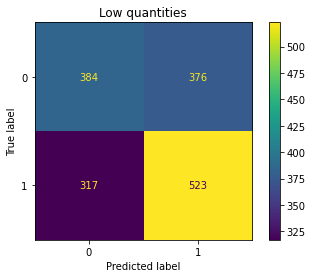

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp21 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp21.plot()
plt.title("Low quantities")
plt.show()